## Time Series Forecasting

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [5]:
df = pd.read_csv(r"Downloads\Index2018.csv")
df_copy = df.copy()
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = True)
df_copy.set_index('date', inplace = True)
df_copy = df_copy.asfreq('b')
df_copy = df_copy.fillna(method = 'ffill')
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Creating Returns

In [6]:
df_copy['ret_spx'] = df_copy.spx.pct_change(1).mul(100)
df_copy['ret_dax'] = df_copy.dax.pct_change(1).mul(100)
df_copy['ret_ftse'] = df_copy.ftse.pct_change(1).mul(100)
df_copy['ret_nikkei'] = df_copy.nikkei.pct_change(1).mul(100)

In [7]:
df_copy['norm_ret_spx'] = df_copy.ret_spx.div(df_copy.ret_spx[1]).mul(100)
df_copy['norm_ret_dax'] = df_copy.ret_dax.div(df_copy.ret_dax[1]).mul(100)
df_copy['norm_ret_ftse'] = df_copy.ret_ftse.div(df_copy.ret_ftse[1]).mul(100)
df_copy['norm_ret_nikkei'] = df_copy.ret_nikkei.div(df_copy.ret_nikkei[1]).mul(100)

## Splitting the Data

In [8]:
size = int(len(df_copy)*0.8)
df, df_test = df_copy.iloc[:size], df_copy.iloc[size:]

## Fitting the Model

In [9]:
model_ar = ARIMA(df.ftse, order = (1,0,0))
result_ar = model_ar.fit()

In [10]:
df.shape

(5021, 12)

## Simple Forecasting

In [11]:
df_test.shape

(1256, 12)

In [12]:
df.tail()

,spx,dax,ftse,nikkei,ret_spx,ret_dax,ret_ftse,ret_nikkei,norm_ret_spx,norm_ret_dax,norm_ret_ftse,norm_ret_nikkei
date,,,,,,,,,,,,
2013-04-01,1562.173837,7795.31,6411.74,12135.02,-0.446858,0.000000,0.000000,-2.120438,-39.102169,0.000000,-0.000000,-120.310679
2013-04-02,1570.252238,7943.87,6490.66,12003.43,0.517126,1.905761,1.230867,-1.084382,45.250898,84804.471406,-785.471020,-61.526326
2013-04-03,1553.686978,7874.75,6420.28,12362.20,-1.054943,-0.870105,-1.084327,2.988896,-92.312390,-38718.796758,691.957459,169.585747
2013-04-04,1559.979316,7817.39,6344.11,12634.54,0.404994,-0.728404,-1.186397,2.203006,35.438855,-32413.252992,757.092562,124.995466
2013-04-05,1553.278930,7658.75,6249.77,12833.64,-0.429518,-2.029322,-1.487049,1.575839,-37.584791,-90302.791085,948.951813,89.410890


In [13]:
start_date = "2013-04-07"
end_date = "2014-01-06"

In [14]:
end_date = "2018-01-20"
df_pred = result_ar.predict(start = start_date, end = end_date) 

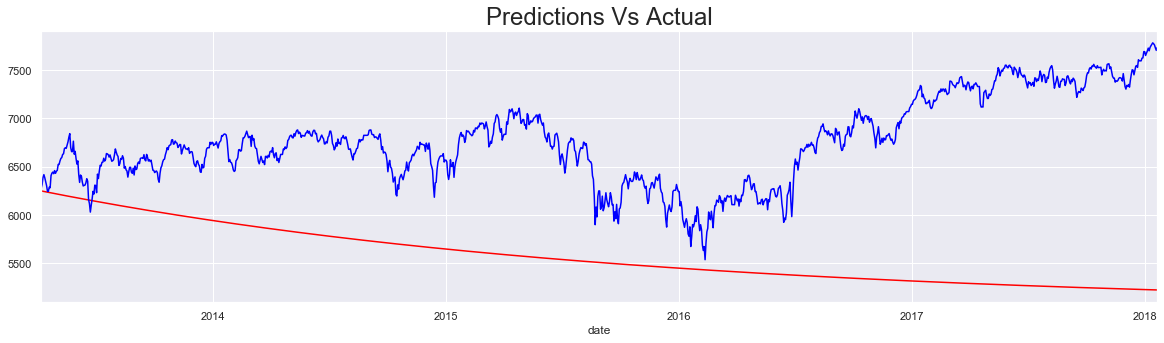

In [15]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red");
df_test.ftse[start_date:end_date].plot(color = "blue");
plt.title("Predictions Vs Actual", size = 24);

## Using Returns Instead

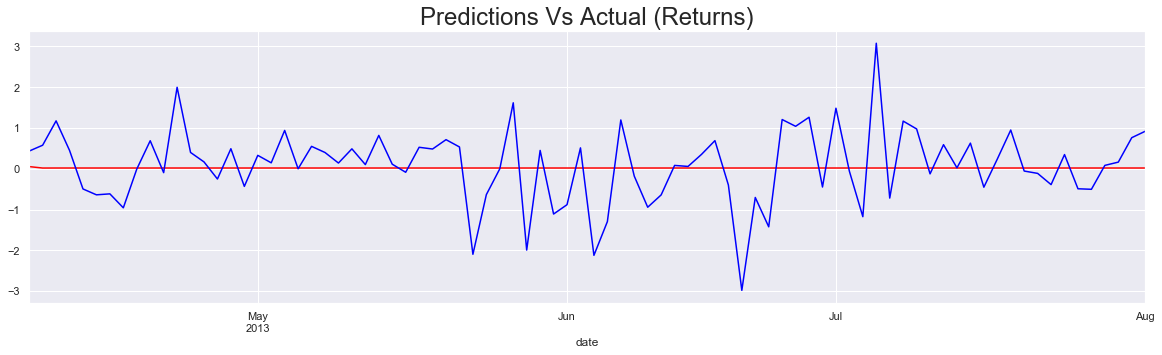

In [16]:
end_date = "2013-08-01"

model_ret_ar = ARIMA(df.ret_ftse[1:], order = (1,0,0))
result_ret_ar = model_ret_ar.fit()

df_ret_pred = result_ret_ar.predict(start = start_date, end = end_date) 

df_ret_pred[start_date:end_date].plot(figsize = (20,5), color = "red");
df_test.ret_ftse[start_date:end_date].plot(color = "blue");
plt.title("Predictions Vs Actual (Returns)", size = 24);

In [17]:
result_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 27 Oct 2020   AIC                          15865.497
Time:                        23:01:02   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.ret_ftse    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

## MA Model

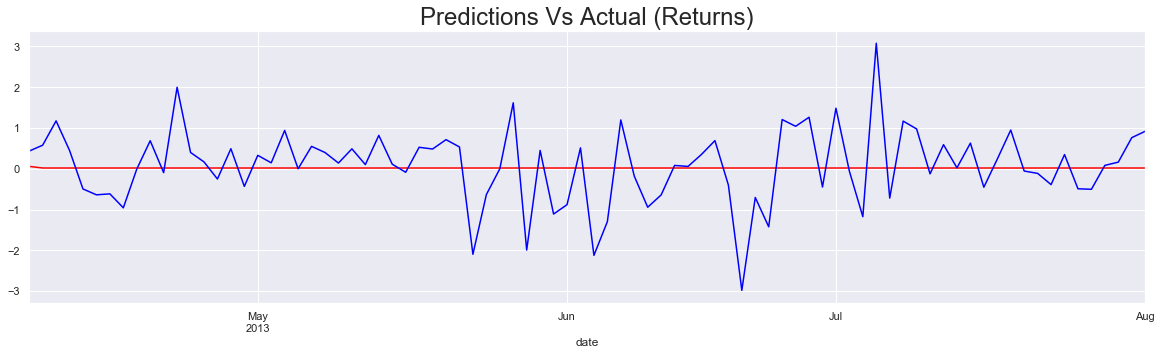

In [18]:
end = "2014-01-01"

model_ret_ma = ARIMA(df.ret_ftse[1:], order = (0,0,1))
result_ret_ma = model_ret_ma.fit()

df_ret_ma_pred = result_ret_ma.predict(start = start_date, end = end_date) 

df_ret_ma_pred[start_date:end_date].plot(figsize = (20,5), color = "red");
df_test.ret_ftse[start_date:end_date].plot(color = "blue");
plt.title("Predictions Vs Actual (Returns)", size = 24);

In [19]:
df_ret_ma_pred.head()

2013-04-08    0.058343
2013-04-09    0.018771
2013-04-10    0.018771
2013-04-11    0.018771
2013-04-12    0.018771
Freq: B, dtype: float64

Here we can see same values after first term which implies there are no error term left in the model.

In [20]:
result_ret_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 27 Oct 2020   AIC                          15865.190
Time:                        23:01:07   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.ret_ftse    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

## ARMA Model

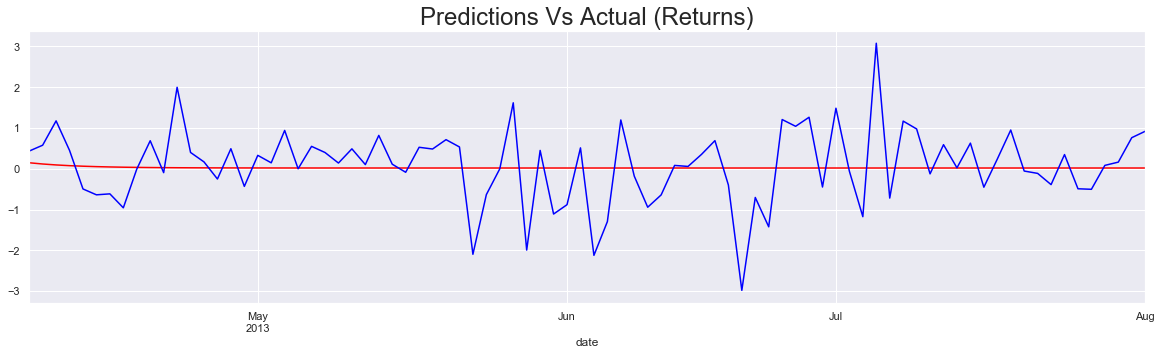

In [21]:
end = "2014-01-01"

model_ret_arma = ARIMA(df.ret_ftse[1:], order = (1,0,1))
result_ret_arma = model_ret_arma.fit()

df_ret_arma_pred = result_ret_arma.predict(start = start_date, end = end_date) 

df_ret_arma_pred[start_date:end_date].plot(figsize = (20,5), color = "red");
df_test.ret_ftse[start_date:end_date].plot(color = "blue");
plt.title("Predictions Vs Actual (Returns)", size = 24);

In [22]:
df_ret_arma_pred.head()

2013-04-08    0.147434
2013-04-09    0.117214
2013-04-10    0.094100
2013-04-11    0.076421
2013-04-12    0.062898
Freq: B, dtype: float64

In [23]:
df_ret_arma_pred.tail()

2013-07-26    0.018907
2013-07-29    0.018907
2013-07-30    0.018907
2013-07-31    0.018907
2013-08-01    0.018907
Freq: B, dtype: float64

ARMA provides more reasonable predictions as they don't die off immediately.

## ARMAX Model

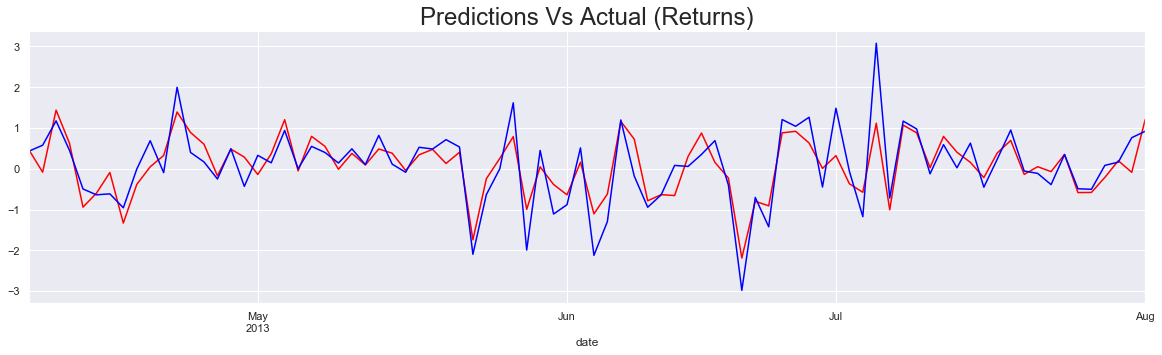

In [24]:
end = "2014-01-01"

model_ret_armax = ARIMA(df.ret_ftse[1:], exog = df[["ret_spx", "ret_dax", "ret_nikkei"]][1:], order = (1,0,1))
result_ret_armax = model_ret_armax.fit()

df_ret_armax_pred = result_ret_armax.predict(start = start_date, end = end_date, 
                                             exog = df_test[["ret_spx", "ret_dax", "ret_nikkei"]]) 

df_ret_armax_pred[start_date:end_date].plot(figsize = (20,5), color = "red");
df_test.ret_ftse[start_date:end_date].plot(color = "blue");
plt.title("Predictions Vs Actual (Returns)", size = 24);

Including the outside factors improved predictive power drastically. As regular ARMA can't incorporate any outside real-world effects. 

# SARMA Model

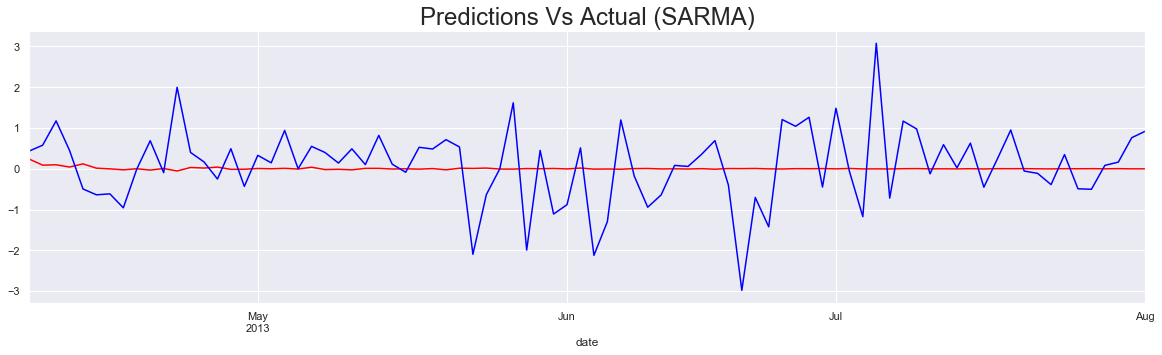

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
end = "2014-01-01"

model_ret_sarma = SARIMAX(df.ret_ftse[1:], order = (3,0,4), seasonal_order = (3,0,2,5))
result_ret_sarma = model_ret_sarma.fit()

df_ret_sarma_pred = result_ret_sarma.predict(start = start_date, end = end_date) 

df_ret_sarma_pred[start_date:end_date].plot(figsize = (20,5), color = "red");
df_test.ret_ftse[start_date:end_date].plot(color = "blue");
plt.title("Predictions Vs Actual (SARMA)", size = 24);

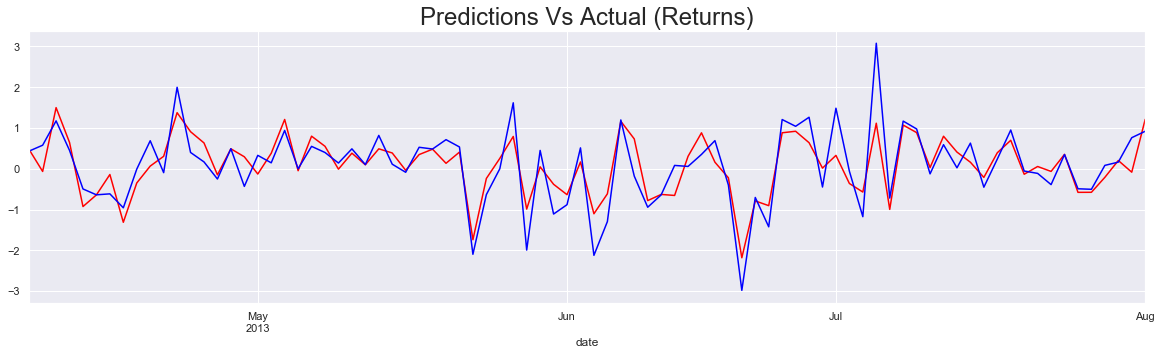

In [26]:
end = "2014-01-01"

model_ret_sarmax = SARIMAX(df.ret_ftse[1:], exog = df[["ret_spx", "ret_dax", "ret_nikkei"]][1:], order = (3,0,4),
                        seasonal_order = (3,0,2,5))
result_ret_sarmax = model_ret_sarmax.fit()

df_ret_sarmax_pred = result_ret_sarmax.predict(start = start_date, end = end_date, 
                                             exog = df_test[["ret_spx", "ret_dax", "ret_nikkei"]][start_date:end_date]) 

df_ret_sarmax_pred[start_date:end_date].plot(figsize = (20,5), color = "red");
df_test.ret_ftse[start_date:end_date].plot(color = "blue");
plt.title("Predictions Vs Actual (Returns)", size = 24);

## Auto ARIMA

In [27]:
from pmdarima.arima import auto_arima

In [25]:
model_auto = auto_arima(df.ret_ftse[1:], exogenous = df[["ret_spx", "ret_dax", "ret_nikkei"]][1:], 
                       m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)

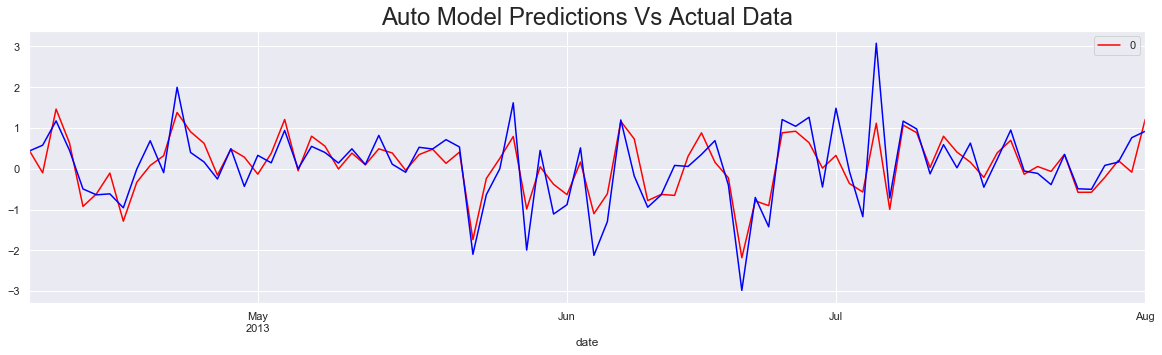

In [26]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date]),
                            exogenous = df_test[["ret_spx", "ret_dax", "ret_nikkei"]][start_date:end_date]),
                          index = df_test[start_date:end_date].index)

df_auto_pred[start_date:end_date].plot(figsize = (20,5), color = "red");
df_test.ret_ftse[start_date:end_date].plot(color = "blue");
plt.title("Auto Model Predictions Vs Actual Data", size = 24);

## Comparing All Model Returns

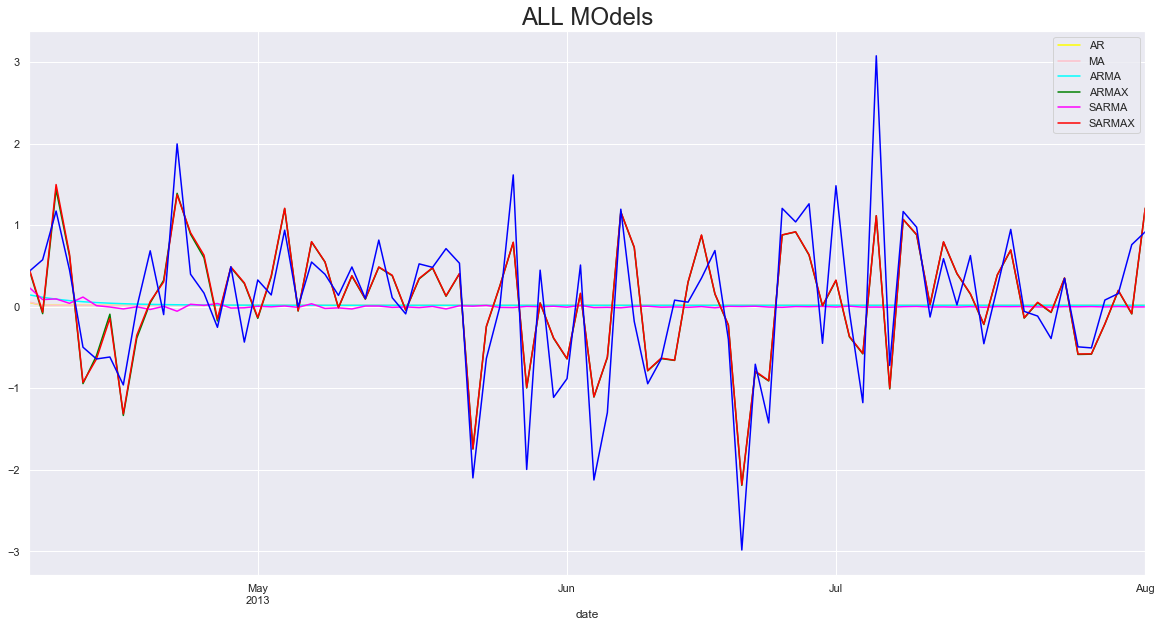

In [27]:
df_ret_pred[start_date:end_date].plot(figsize = (20,10), color = "yellow");
df_ret_ma_pred[start_date:end_date].plot(figsize = (20,10), color = "pink");
df_ret_arma_pred[start_date:end_date].plot(figsize = (20,10), color = "cyan");
df_ret_armax_pred[start_date:end_date].plot(figsize = (20,10), color = "green");
df_ret_sarma_pred[start_date:end_date].plot(figsize = (20,10), color = "magenta");
df_ret_sarmax_pred[start_date:end_date].plot(figsize = (20,10), color = "red");
df_test.ret_ftse[start_date:end_date].plot(color = "blue");
plt.legend(["AR","MA","ARMA","ARMAX","SARMA","SARMAX"])
plt.title("ALL MOdels", size = 24);

We can see that models with exogenous variables perform the best among all.

## Forecasting Volatility

In [29]:
from arch import arch_model
mod_garch = arch_model(df_copy.ret_ftse[1:], mean = "Constant", vol = "Garch", p = 1, q = 1, dist = "Normal")
result_garch = mod_garch.fit(last_obs = start_date, update_freq = 10)
result_garch.summary()

Iteration:     10,   Func. Count:     73,   Neg. LLF: 6970.088043671654
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6970.058366189876
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               ret_ftse   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Tue, Oct 27 2020   Df Residuals:                     5016
Time:                        22:43:07   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

In [30]:
pred_garch = result_garch.forecast(horizon = 1, align = "target")

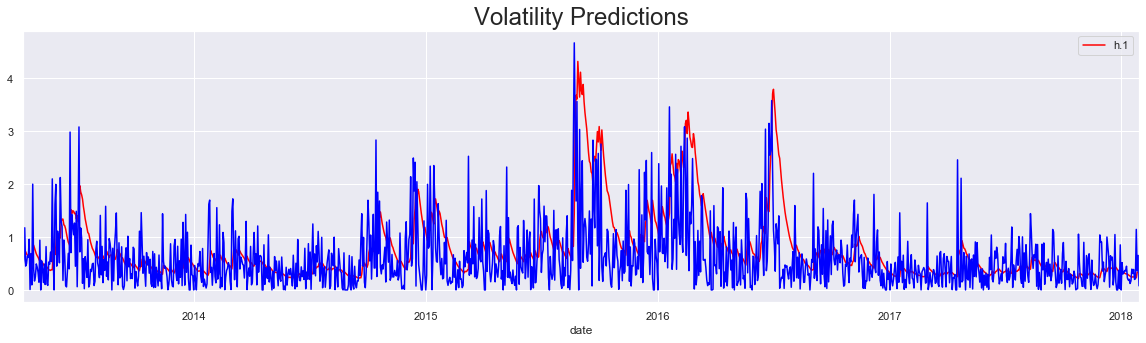

In [35]:
pred_garch.residual_variance[start_date:].plot(figsize = (20,5), color = "red", zorder = 1);
df_test.ret_ftse.abs().plot(color = "blue", zorder = 2)
plt.title("Volatility Predictions", size = 24);
plt.show()

In [36]:
pred_garch = result_garch.forecast(horizon = 100, align = "target")
pred_garch.residual_variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
date,,,,,,,,,,,,,,,,,,,,,
2018-01-29,0.343523,0.340599,0.354857,0.25736,0.274579,0.289543,0.300044,0.309239,0.313105,0.329072,...,0.924114,0.92664,0.944064,0.963335,0.981329,0.993313,0.958609,0.915886,0.925795,0.938776


## Multivariate Forecasting

In [28]:
from statsmodels.tsa.api import VAR

In [29]:
df_ret = df[["ret_ftse", "ret_spx", "ret_dax", "ret_nikkei"]][1:]

In [31]:
model_var_ret = VAR(df_ret)
model_var_ret.select_order(20)
result_var_ret = model_var_ret.fit(ic = "aic")
result_var_ret.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 27, Oct, 2020
Time:                     23:04:25
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.475578
Nobs:                     5015.00    HQIC:                  0.404637
Log likelihood:          -29298.6    FPE:                    1.44248
AIC:                     0.366366    Det(Omega_mle):         1.41857
--------------------------------------------------------------------
Results for equation ret_ftse
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.009762         0.015427            0.633           0.527
L1.ret_ftse          -0.218433         0.022746           -9.603           0.000
L1.ret_spx            0.428397         0.016419          

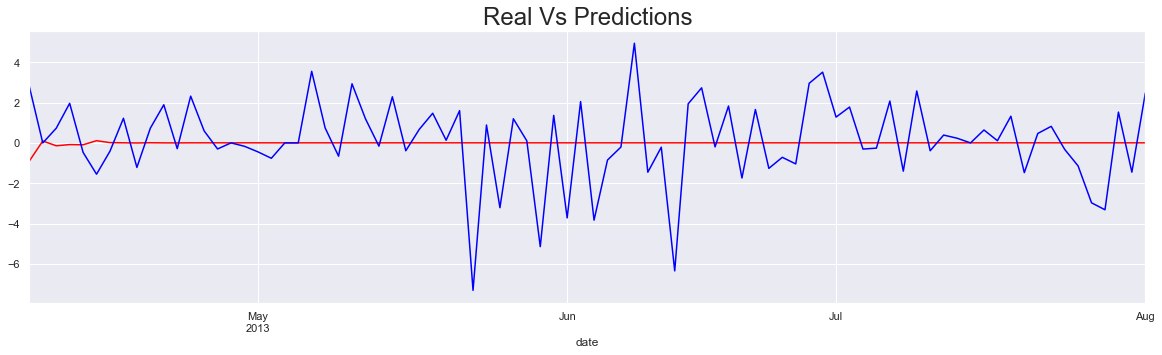

In [33]:
lag_order_ret = result_var_ret.k_ar
var_pred_ret = result_var_ret.forecast(df_ret.values[-lag_order_ret:], len(df_test[start_date:end_date]))

df_ret_pred = pd.DataFrame(data =  var_pred_ret, index = df_test[start_date:end_date].index,
                          columns = df_test[start_date:end_date].columns[4:8])

df_ret_pred.ret_nikkei[start_date:end_date].plot(figsize = (20,5), color = "red");

df_test.ret_nikkei[start_date:end_date].plot(color = "blue");
plt.title("Real Vs Predictions", size = 24);

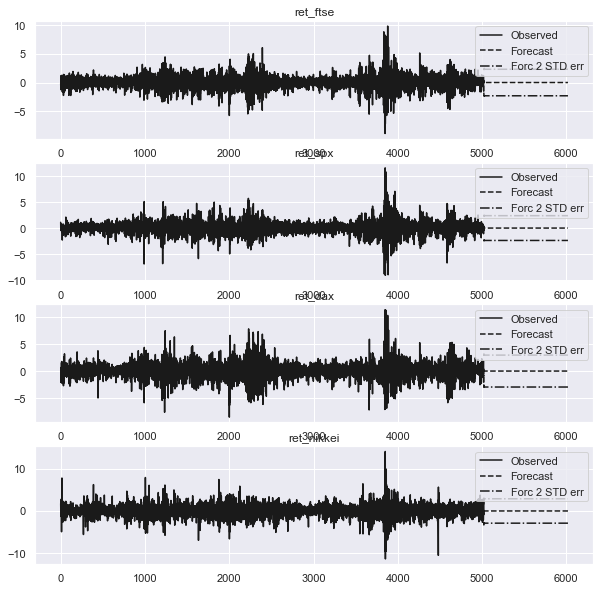

In [35]:
result_var_ret.plot_forecast(1000)
plt.show()